## Libaries

In [1]:
# Main libraries installation
!pip install geopandas geopy pandas plotly > nul

In [2]:
# Import necessary libraries
import geopandas as gpd      # Importing the geopandas library for working with geospatial data
import pandas as pd          # Importing the pandas library for data manipulation and analysis
from geopy.geocoders import Nominatim  # Importing the Nominatim geocoder from the geopy library
import plotly.express as px  # Importing the Plotly Express library for interactive visualizations
import plotly.io as pio       # Importing the Plotly I/O library for handling Plotly I/O
from IPython.display import Image  # Importing the Image class from IPython.display for displaying images in the IPython environment
import warnings  # Importing the warnings library for managing warnings

# Disable deprecation warnings to suppress unnecessary warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Ingestion

In [3]:
# Create a DataFrame with museum names and addresses
data = {
    'Museum': ['Prado Museum', 'Reina Sofía National Art Center Museum', 'Thyssen-Bornemisza Museum'],
    'Address': [
        'Paseo del Prado, s/n, 28014 Madrid, Spain',
        'Calle de Santa Isabel, 52, 28012 Madrid, Spain',
        'Paseo del Prado, 8, 28014 Madrid, Spain'
    ]
}

museums_df = pd.DataFrame(data)

museums_df

,Museum,Address
0,Prado Museum,"Paseo del Prado, s/n, 28014 Madrid, Spain"
1,Reina Sofía National Art Center Museum,"Calle de Santa Isabel, 52, 28012 Madrid, Spain"
2,Thyssen-Bornemisza Museum,"Paseo del Prado, 8, 28014 Madrid, Spain"


## Data exploring

In [4]:
# Create a Nominatim geolocator with a specific user agent
geolocator = Nominatim(user_agent="my_geocoder")

# Add latitude and longitude columns to the DataFrame
museums_df['Coordinates'] = museums_df['Address'].apply(lambda x: geolocator.geocode(x) if geolocator.geocode(x) is not None else None)

# Split the coordinates into latitude and longitude
museums_df[['Latitude', 'Longitude']] = pd.DataFrame(museums_df['Coordinates'].apply(lambda x: (x.latitude, x.longitude) if x is not None else (None, None)).tolist())

In [5]:
# Filter rows with valid coordinates
valid_museums_df = museums_df.dropna(subset=['Latitude', 'Longitude'])

valid_museums_df

,Museum,Address,Coordinates,Latitude,Longitude
0,Prado Museum,"Paseo del Prado, s/n, 28014 Madrid, Spain","(Paseo del Prado, Barrio de las Letras, Cortes...",40.419122,-3.693652
1,Reina Sofía National Art Center Museum,"Calle de Santa Isabel, 52, 28012 Madrid, Spain","(Museo Nacional Centro de Arte Reina Sofía, 52...",40.408050,-3.694422
2,Thyssen-Bornemisza Museum,"Paseo del Prado, 8, 28014 Madrid, Spain","(Museo Thyssen-Bornemisza, 8, Paseo del Prado,...",40.416216,-3.694932


## Data Visualization

In [6]:
# Create an interactive map with Plotly Express and Mapbox
fig = px.scatter_mapbox(
    valid_museums_df,
    lat='Latitude',
    lon='Longitude',
    hover_name='Museum',
    zoom=12,
    size_max=15,  # Adjust the size of the points here
    color_discrete_sequence=['fuchsia']  # Set the color of the points to fuchsia
)

# Update the layout of the map
fig.update_layout(
    mapbox=dict(
        style="carto-positron",  # Set the Mapbox style to carto-positron
        center=dict(lon=-3.70379, lat=40.4168),  # Set the initial center of the map
        zoom=11,  # Set the initial zoom level of the map
    ),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),  # Adjust the position of the legend
)

# Show the map
fig.show()

In [7]:
# Assuming 'fig' is your Plotly figure
pio.write_html(fig, 'data/geocoding.html')

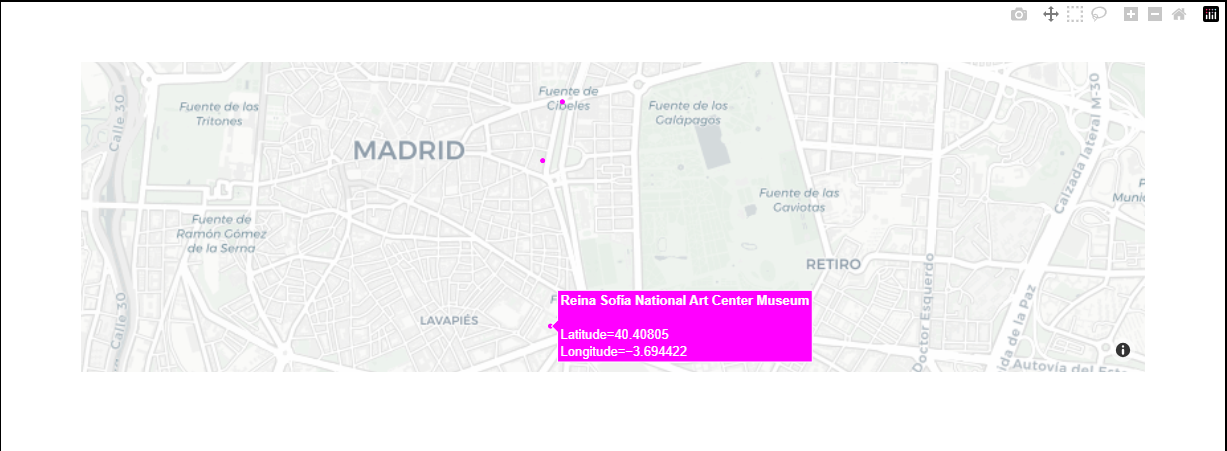

In [8]:
# Path to your PNG file
ruta_archivo_png = 'data/geocoding.png'  # Replace with the correct path

# Display the image in the notebook
Image(filename=ruta_archivo_png)